In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
def firstroundsim (msize, totaldis):
    #m,n=np.indices((msize,msize))
    newm = np.zeros((msize,msize))
    for i in range(0,totaldis):
        newm[range(0,msize)[:(msize-i)],range(0+i,msize+i)[:(msize-i)]] = np.random.poisson(200.0/(i+1), msize-i) ###200 was calculated from Rao cell 2014
    return newm

In [29]:
def addtadsim (mat1, tadlist):
    mat = np.copy(mat1)
    msize = np.shape(mat)[0]
    tadsize = tadlist[:,1]-tadlist[:,0]
    for j in range(0,len(tadsize)):
        for i in range(0,tadsize[j]+1):
            mat[range(0,msize)[:(msize-i)][tadlist[j,0]:(tadlist[j,1]+1-i)],range(0+i,msize+i)[:(msize-i)][tadlist[j,0]:(tadlist[j,1]+1-i)]]=np.random.poisson(200.0*2/(i+1), tadsize[j]+1-i)
    return mat

In [30]:
def addloopsim (mat1, looplist):
    mat = np.copy(mat1)
    for j in range(0,len(looplist)):
        mat[looplist[j,0],looplist[j,1]]=np.random.poisson(200.0*8/(looplist[j,1]-looplist[j,0]+1), 1)
    return mat

In [31]:
def addnoise (mat1):
    mat = np.copy(mat1)
    msize = np.shape(mat)[0]
    mat = mat + np.random.poisson(1, msize*msize).reshape(msize,msize)
    return mat

In [32]:
tdlist = np.array([[0,120],[120,159],[159,215],[215,429],[529,665],[705,765],[765,850],[850,950],[950,999]])

In [33]:
matsize = 3000
leftt = np.sort(np.random.randint(0,matsize-1,size=20))
if leftt[0]!=0:
    leftt = np.append(0,leftt)
if leftt[-1]==matsize-1:
    np.delete(leftt,-1)
rightt = np.append(leftt[1::],matsize-1)
tdlist_i = np.column_stack((leftt,rightt))
tdlist = tdlist_i[tdlist_i[:,1]-tdlist_i[:,0]>5]

In [34]:
looploc = np.random.randint(0,matsize-500, size=(matsize/10))
looplist = np.column_stack((looploc,looploc+np.random.randint(5,500, size=(matsize/10))))

In [35]:
simmat = firstroundsim(matsize,matsize)
simmat_t = addtadsim(simmat,tdlist)
simmat_l = addloopsim(simmat_t,looplist)
simmat_f = addnoise(simmat_l)
i_lower = np.tril_indices(matsize, -1)
simmat_f[i_lower] = simmat_f.T[i_lower]

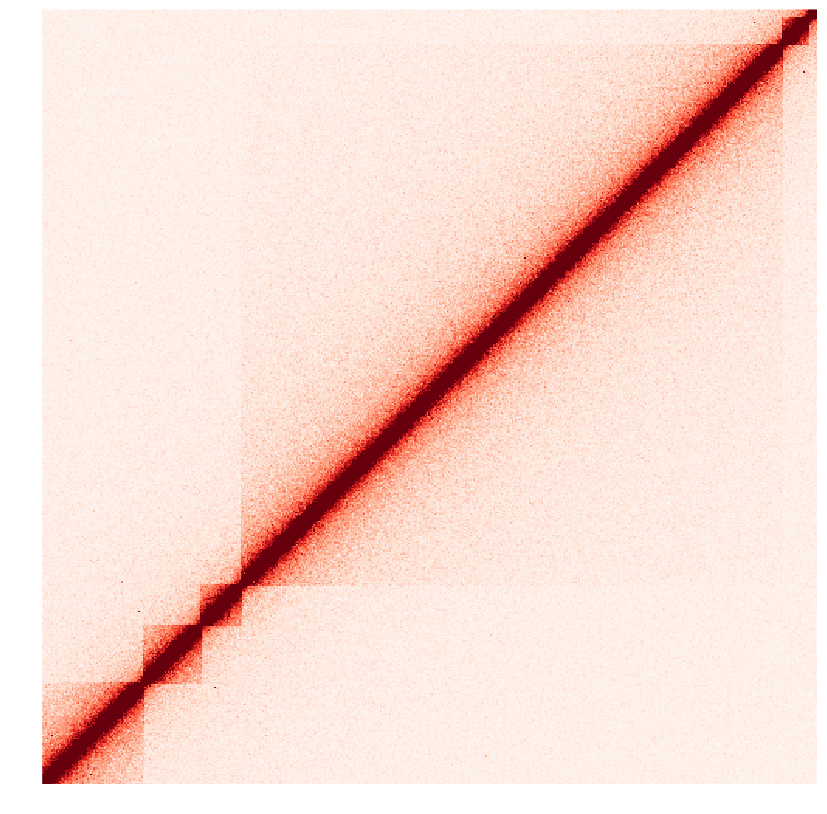

In [37]:
plt.figure(2)
fig, axs = plt.subplots(1,1,figsize=(10,10))
axs.imshow(simmat_f[500:1000,500:1000], cmap=plt.cm.Reds, interpolation='none', origin='lower',vmin = 0, vmax = 50, aspect=1)
plt.axis('off')
plt.show()

In [38]:
np.save('/Users/linan/Box/TADcalling/simmat',simmat_f)

In [39]:
np.save('/Users/linan/Box/TADcalling/simmat_loop',looplist)

In [40]:
np.save('/Users/linan/Box/TADcalling/simmat_tad',tdlist)

In [2]:
simmatout = np.loadtxt('/Users/linan/Box/TADcalling/benchmarks/maptest_1.txt',delimiter='\t')

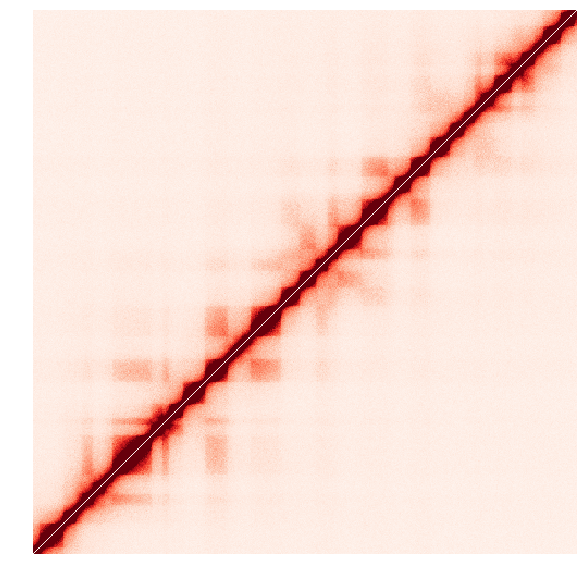

In [6]:
plt.figure(2)
fig, axs = plt.subplots(1,1,figsize=(10,10))
axs.imshow(simmatout, cmap=plt.cm.Reds, interpolation='none', origin='lower',vmin = 0, vmax = 250, aspect=1)
plt.axis('off')
plt.show()